In [250]:
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

data = pd.read_json('uebungsdatei.json')
data.tail()

,calEvents,datumBeginn,datumEnde,desc,gruppenName,name,newEvents,ort,score,speichern,uhrzeitBeginn,uhrzeitEnde,url
945,[],NaN,NaN,"[In Zeiten von Docker, Big Data und Microservi...",NaN,,[],,22,True,NaN,NaN,NaN
946,[],,,<p>Inhalt des 20. Info-Treffs</p> <p>C++ im Em...,C++ User Group Karlsruhe,C++ im Embedded-Medizinger�t � Lohnt der Einsa...,[],"Am Fasanengarten 5, Karlsruhe",23,True,,,https://www.meetup.com/C-User-Group-Karlsruhe/...
947,[],2018-08-16,2018-08-16,<p>Are you longing to hear and talk about that...,karlsruhe.ai,[Casual] Community Conversation about Machine ...,[],"Haid-und-Neu Str. 18, Karlsruhe, Karlsruhe",24,True,19:00,22:00,https://www.meetup.com/karlsruhe-ai/events/253...
948,[],,,<p>Die GDG Karlsruhe l�dt zum August-Meetup!</...,GDG Karlsruhe,GDG Karlsruhe August-Meetup,[],"Durlacher Allee 93, Karlsruhe",29,True,,,https://www.meetup.com/GDG-Karlsruhe/events/25...
949,[],2018-08-17,2018-08-17,<p>Blockchain is one of the most confusing ter...,Heidelberg Web Development & Ruby Meetup,Instaffo Blockchain-Day: Between Technology an...,[],"R�merstrasse 135, Heidelberg",33,True,17:00,21:00,https://www.meetup.com/Heidelberg-Web-Dev-Ruby...


In [251]:
data['speichern'].value_counts()

False    920
True      30
Name: speichern, dtype: int64

# HTML-Tags in Beschreibung entfernen

In [252]:
imp_data = data[['speichern','desc','gruppenName','name','ort']]

In [253]:
imp_data_plain = imp_data.copy()
imp_data_plain['desc']=imp_data['desc'].apply(lambda x : x.replace('"',''))
imp_data_plain['desc']=imp_data['desc'].apply(lambda x : x.replace('<p>',''))
imp_data_plain['desc']=imp_data['desc'].apply(lambda x : x.replace('</p>',''))
imp_data_plain['desc']=imp_data['desc'].apply(lambda x : x.replace('<b>',''))
imp_data_plain['desc']=imp_data['desc'].apply(lambda x : x.replace('</b>',''))

In [254]:
imp_data_plain.head()

,speichern,desc,gruppenName,name,ort
0,False,[Technisches Verst�ndnis und Kenntnisse in der...,NaN,,
1,False,Kultur im Cyberspace und jugendliche Lebenswel...,NaN,,
2,False,[Kommunikation mit Computern ist wundervoll ei...,NaN,,
3,False,Talklet (Vortrags- und Diskussionsabend) am Do...,NaN,,
4,False,"[NOSQL, Big Data und Graphen sind zur Zeit in ...",NaN,,


# Datenset splitten

In [255]:
X_all = imp_data_plain.drop('speichern', axis=1)
Y_all = imp_data_plain["speichern"]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in sss.split(X_all, Y_all):
    X_train, X_test = X_all.iloc[train_index], X_all.iloc[test_index]
    Y_train, Y_test = Y_all.iloc[train_index], Y_all.iloc[test_index]

# Beschreibungen vectorisieren und Vokabular anlegen

In [256]:
X_train_string = ""
for x in range(0, imp_data_plain.shape[0]):
    X_train_string = X_train_string + imp_data_plain.iloc[x]['desc']

X_train_strings = X_train_string.split(" ")
cv = TfidfVectorizer( min_df = 0.00015 ,max_df = 0.0002)
cv.fit(X_train_strings)
X_train_cv = cv.transform(X_train['desc']).toarray()

In [257]:
len(X_train_strings)

87220

In [258]:
len(cv.get_feature_names())

221

In [259]:
cv.get_feature_names()

['07',
 '22',
 '25',
 '26',
 '67',
 'abh',
 'ajax',
 'aktiv',
 'aktuelle',
 'allen',
 'aller',
 'alltag',
 'alternativen',
 'anderem',
 'andreas',
 'anf',
 'another',
 'ans',
 'app',
 'apps',
 'arbeit',
 'arbeiten',
 'around',
 'art',
 'artmasters',
 'aspekte',
 'atmosph',
 'ausf',
 'based',
 'bauen',
 'bedeutung',
 'before',
 'begr',
 'beispiele',
 'berater',
 'bernd',
 'besonders',
 'besteht',
 'bibliotheken',
 'bringt',
 'buch',
 'camel',
 'camunda',
 'caption',
 'ce',
 'chaos',
 'cher',
 'chlich',
 'ck',
 'codecentric',
 'come',
 'computing',
 'container',
 'content',
 'daf',
 'daraus',
 'deine',
 'demos',
 'derzeit',
 'dessen',
 'dinge',
 'diskutiert',
 'docker',
 'don',
 'drinks',
 'dt',
 'each',
 'eco',
 'einblick',
 'eingegangen',
 'einigen',
 'einmal',
 'engine',
 'erdem',
 'erl',
 'erstellung',
 'exchange',
 'experience',
 'fast',
 'februar',
 'fokus',
 'foundation',
 'fraunhofer',
 'freiberuflicher',
 'funktionale',
 'gartenstra',
 'genau',
 'gerd',
 'germany',
 'gespr',
 'g

In [260]:
Y_train = Y_train.astype('int')

In [261]:
Y_test = Y_test.astype('int')

In [262]:
X_test_cv = cv.transform(X_test['desc'])

In [263]:
def myEvaluation(y_pred):
    print(classification_report(Y_test, y_pred, digits=4))
    sns.heatmap(confusion_matrix(Y_test, y_pred), square=True, annot=True)
    plt.show()

# DecisionTree

             precision    recall  f1-score   support

          0     0.9681    0.9891    0.9785       184
          1     0.0000    0.0000    0.0000         6

avg / total     0.9375    0.9579    0.9476       190



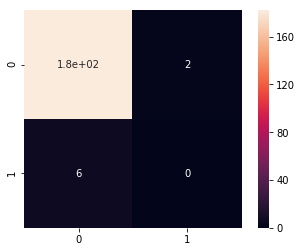

In [264]:
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train_cv, Y_train)
y_pred_tree = clf_tree.predict(X_test_cv)
myEvaluation(y_pred_tree)

# DecisionTree + ROS

             precision    recall  f1-score   support

          0     0.9672    0.9620    0.9646       184
          1     0.0000    0.0000    0.0000         6

avg / total     0.9367    0.9316    0.9341       190



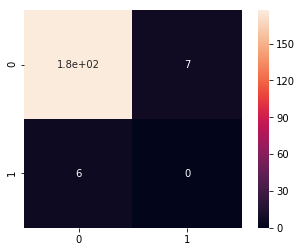

In [265]:
ros = RandomOverSampler()
X_ros_res, y_ros_res = ros.fit_sample(X_train_cv, Y_train)
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_ros_res, y_ros_res)
y_pred_tree = clf_tree.predict(X_test_cv)
myEvaluation(y_pred_tree)

# DecisionTree + SMOTE

             precision    recall  f1-score   support

          0     0.9724    0.9565    0.9644       184
          1     0.1111    0.1667    0.1333         6

avg / total     0.9452    0.9316    0.9381       190



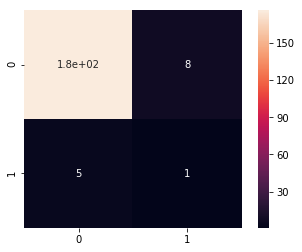

In [266]:
s = SMOTE()
X_s_res, y_s_res = s.fit_sample(X_train_cv, Y_train)
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_s_res, y_s_res)
y_pred_tree = clf_tree.predict(X_test_cv)
myEvaluation(y_pred_tree)

# Decisiontree + ADASYN

             precision    recall  f1-score   support

          0     0.9724    0.9565    0.9644       184
          1     0.1111    0.1667    0.1333         6

avg / total     0.9452    0.9316    0.9381       190



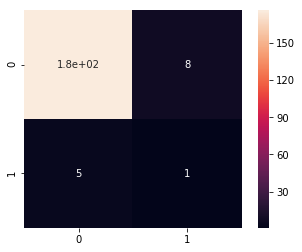

In [267]:
ada = ADASYN()
X_ada_res, y_ada_res = ada.fit_sample(X_train_cv, Y_train)
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_ada_res, y_ada_res)
y_pred_tree = clf_tree.predict(X_test_cv)
myEvaluation(y_pred_tree)

# DecisionTree + RandomUnderSampler

             precision    recall  f1-score   support

          0     0.9716    0.9293    0.9500       184
          1     0.0714    0.1667    0.1000         6

avg / total     0.9432    0.9053    0.9232       190



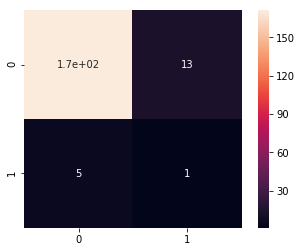

In [268]:
rus = RandomUnderSampler()
X_rus_res, y_rus_res = rus.fit_sample(X_train_cv, Y_train)
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_rus_res, y_rus_res)
y_pred_tree = clf_tree.predict(X_test_cv)
myEvaluation(y_pred_tree)

# RandomForestTree

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0     0.9684    1.0000    0.9840       184
          1     0.0000    0.0000    0.0000         6

avg / total     0.9378    0.9684    0.9529       190



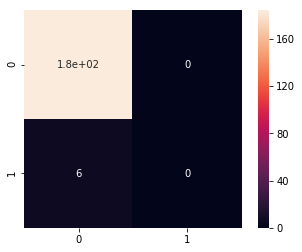

In [269]:
clf_rdm_tree = RandomForestClassifier(n_estimators=75, max_depth=30)
clf_rdm_tree.fit(X_train_cv, Y_train)
y_pred_rdmForest = clf_rdm_tree.predict(X_test_cv)
myEvaluation(y_pred_rdmForest)

# AdaBoostTree

             precision    recall  f1-score   support

          0     0.9683    0.9946    0.9812       184
          1     0.0000    0.0000    0.0000         6

avg / total     0.9377    0.9632    0.9502       190



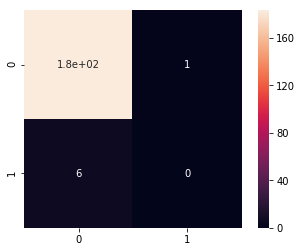

In [270]:
clf_adaBoost_tree = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=25),
                         algorithm="SAMME",
                         n_estimators=75)

clf_adaBoost_tree.fit(X_train_cv, Y_train)
y_pred_adaBoost = clf_adaBoost_tree.predict(X_test_cv)
myEvaluation(y_pred_adaBoost)

# GradientBoostingTree

             precision    recall  f1-score   support

          0     0.9681    0.9891    0.9785       184
          1     0.0000    0.0000    0.0000         6

avg / total     0.9375    0.9579    0.9476       190



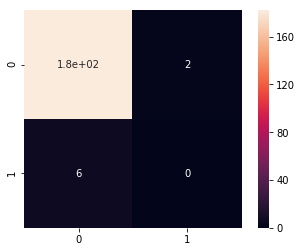

In [271]:
clf_gradBoost_tree = GradientBoostingClassifier(n_estimators=75, learning_rate=0.1, max_depth=50)
clf_gradBoost_tree.fit(X_train_cv, Y_train)
y_pred_gradBoost = clf_gradBoost_tree.predict(X_test_cv)
myEvaluation(y_pred_gradBoost)

# GradientBoostingTree + RUS

             precision    recall  f1-score   support

          0     0.9756    0.8696    0.9195       184
          1     0.0769    0.3333    0.1250         6

avg / total     0.9472    0.8526    0.8944       190



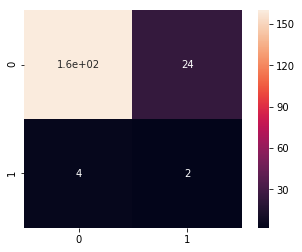

In [272]:
rus = RandomUnderSampler()
X_rus_res, y_rus_res = rus.fit_sample(X_train_cv, Y_train)
clf_gradBoost_tree = GradientBoostingClassifier(n_estimators=75, learning_rate=0.1, max_depth=30)
clf_gradBoost_tree.fit(X_rus_res, y_rus_res)
y_pred_gradBoost = clf_gradBoost_tree.predict(X_test_cv)
myEvaluation(y_pred_gradBoost)